# Investigating Fandango Movie Ratings

<br>

<br>

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator).

<br>

![link](https://s3.amazonaws.com/dq-content/288/s1gp_fdg_stars.png)

<br>



- The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.


- In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.


- For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

<br>

We'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

One of the best ways is to compare the system characteristics before and after the analysis.

- Walt Hickey made the data he analyzed publicly available on [GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango)

- A Dataquest's team members collected movie ratings data for movies released in 2016 and 2017, the data is avaiable on [Github](https://github.com/mircealex/Movie_ratings_2016_17https://github.com/mircealex/Movie_ratings_2016_17).

#### Load data:

In [1]:
import pandas as pd

previous_data = pd.read_csv("fandango_score_comparison.csv")
after_data = pd.read_csv("movie_ratings_16_17.csv")
scrapped = pd.read_csv("scrappe.csv")

In [2]:
! ls

'alumno Project Investigating Fandango Movie Ratings.ipynb'
 Basics.ipynb
 fandango_score_comparison.csv
'Guided Project_ Investigating Fandango Movie Ratings.tar'
'Investigating Fandango Movie Ratings.ipynb'
'measure sampling error using WNBA dataset.md'
 movie_ratings_16_17.csv
 output_7_1.png
 scrappe.csv


In [3]:
%%html
<style>
table {float:left}
</style>

### Data dictionary:

`fandango_score_comparison.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Fandango_Stars | The number of stars the film had on its Fandango movie page
Fandango_Ratingvalue | The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
RT_norm | The Rotten Tomatoes Tomatometer score  for the film , normalized to a 0 to 5 point system
RT_user_norm | The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system
Metacritic_norm | The Metacritic critic score for the film, normalized to a 0 to 5 point system
Metacritic_user_nom | The Metacritic user score for the film, normalized to a 0 to 5 point system
IMDB_norm | The IMDb user score for the film, normalized to a 0 to 5 point system
RT_norm_round | The Rotten Tomatoes Tomatometer score  for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star
RT_user_norm_round | The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star
Metacritic_norm_round | The Metacritic critic score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
Metacritic_user_norm_round | The Metacritic user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
IMDB_norm_round | The IMDb user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb
Fandango_votes | The number of user votes the film had on Fandango
Fandango_Difference | The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue



`movie_ratings_16_17.csv` contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.


Column | Description
--- | ---------
movie | the name of the movie
year | the release year of the movie
metascore | the Metacritic rating of the movie (the "metascore" - critic score)
imdb | the IMDB rating of the movie (user score)
tmeter | the Rotten Tomatoes rating of the movie (the "tomatometer" - critic score)
audience | the Rotten Tomatoes rating of the movie (user score)
fandango | the Fandango rating of the movie (user score)
n_metascore | the metascore normalized to a 0-5 scale
n_imdb | the IMDB rating normalized to a 0-5 scale
n_tmeter | the tomatometer normalized to a 0-5 scale
n_audience | the Rotten Tomatoes user score normalized to a 0-5 scale
nr_metascore | the metascore normalized to a 0-5 scale and rounded to the nearest 0.5
nr_imdb | the IMDB rating normalized to a 0-5 scale and rounded to the nearest 0.5
nr_tmeter | the tomatometer normalized to a 0-5 scale and rounded to the nearest 0.5
nr_audience | the Rotten Tomatoes user score normalized to a 0-5 scale and rounded to the nearest 0.5

This is what both dataframes look like. 

We can see the difference between the two both in number of rows and attributes.

In [4]:
previous_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Fandango_Stars              146 non-null    float64
 7   Fandango_Ratingvalue        146 non-null    float64
 8   RT_norm                     146 non-null    float64
 9   RT_user_norm                146 non-null    float64
 10  Metacritic_norm             146 non-null    float64
 11  Metacritic_user_nom         146 non-null    float64
 12  IMDB_norm                   146 non-null    float64
 13  RT_norm_round               146 non

In [5]:
previous_data.head(3)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5


---

In [6]:
after_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movie         214 non-null    object 
 1   year          214 non-null    int64  
 2   metascore     214 non-null    int64  
 3   imdb          214 non-null    float64
 4   tmeter        214 non-null    int64  
 5   audience      214 non-null    int64  
 6   fandango      214 non-null    float64
 7   n_metascore   214 non-null    float64
 8   n_imdb        214 non-null    float64
 9   n_tmeter      214 non-null    float64
 10  n_audience    214 non-null    float64
 11  nr_metascore  214 non-null    float64
 12  nr_imdb       214 non-null    float64
 13  nr_tmeter     214 non-null    float64
 14  nr_audience   214 non-null    float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [7]:
after_data.head(3)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.5,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.5,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.0,2.35,2.5,3.5,2.0,2.5


Defining the population of interest for our goal — our goal is to determine whether there has been any change in Fandango's rating system **after** Hickey's analysis.

By reading the README.md files of the two repositories, figure out whether the two samples are representative for the population we're trying to describe.

Determine whether the sampling is random or not — did all the movies have an equal chance to be included in the two samples?

In [8]:
### Isolating important columns for our analysis:

select_predata = previous_data[['FILM', 'Fandango_Stars',
                             'Fandango_Ratingvalue',
                             'Fandango_votes',
                             'Fandango_Difference']].copy()

select_postdata = after_data[['movie', 'year', 'fandango']].copy()

In [9]:
select_predata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   Fandango_Stars        146 non-null    float64
 2   Fandango_Ratingvalue  146 non-null    float64
 3   Fandango_votes        146 non-null    int64  
 4   Fandango_Difference   146 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 5.8+ KB


In [10]:
select_predata.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5


In [11]:
select_postdata.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


it is necessary to extract the numerical value of the years in the column FILM

Apparently all the rows contain years between parentheses, what we are going to do is extract those years by creating a new column.

In [12]:
select_predata['FILM'].unique

<bound method Series.unique of 0                 Avengers: Age of Ultron (2015)
1                              Cinderella (2015)
2                                 Ant-Man (2015)
3                         Do You Believe? (2015)
4                  Hot Tub Time Machine 2 (2015)
                         ...                    
141                            Mr. Holmes (2015)
142                                   '71 (2015)
143                   Two Days, One Night (2014)
144    Gett: The Trial of Viviane Amsalem (2015)
145           Kumiko, The Treasure Hunter (2015)
Name: FILM, Length: 146, dtype: object>

The name of the new column will be the same `year` with which we compare later the dataframes so it will be easier to understand.

In [13]:
years = []

for elements in select_predata['FILM']:
    years.append(elements[-5:-1])
select_predata['year'] = pd.Series(years)

select_predata['year'].head(10)

0    2015
1    2015
2    2015
3    2015
4    2015
5    2015
6    2015
7    2014
8    2015
9    2015
Name: year, dtype: object

Now we can have extracted the years we can compare the years of both dataframes.

In [14]:
select_predata['year'].value_counts(dropna=False)

2015    129
2014     17
Name: year, dtype: int64

In [15]:
select_postdata['year'].value_counts(dropna=False)

2016    191
2017     23
Name: year, dtype: int64

We can see that the comparison between dataframes is different, therefore before continuing it is important to remember that we were told in the `README` of both dataframes

<br>

<br>

`previousdata README.md`

`previousdata` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

<br>

Whereas in `afterdata README.md`

`afterdata` It contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date.

----

From the output of `value_counts()` method on the `year` of the movie released of both our datasets and from our read of both dataset's `README.md`  - we conclude that:

- The contents in both dataset is **bias** *with preferences of movie ratings*

- The `previousdata` dataset content was **pulled on Aug. 24, 2015** 
- `afterdata` dataset content is of **movies released in 2016-2017**.

<br>


That is to say the `previousdata` dataset doesnot contain movies ratings of `afterdata` dataset and vice versa.

---

So at this point, we have at least two alternatives: 
- either we collect new data 
- either we change the goal of our analysis by placing some limitations on it.

<br>

Therefore we select the last option with some particularities

We will slightly change our initial analysis target. So our new target would be a pretty good indicator by which the population of interest changes and the samples we work with become representative.


### Our new goal now.

Determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. 

Now with the new goal, we have two populations that we want to describe and compare with each other:

- All Fandango's ratings for popular movies released in 2015. 

- All Fandango's ratings for popular movies released in 2016.

#### The term "popular" is vague and we need to define it with precision before continuing. 

We'll use Hickey's benchmark of **30 fan ratings** and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

As metioned in `README.md` of our `previousdata` dataset that all its contents has at least 30 fan reviews on Fandango. So for `selprevious` we have this criteria fulfilled. 

But in `README.md` of our `afterdata` dataset has no such specifically mentioned about 30 fan ratings, and so this may raise representativity issues once again.

<br>

So let us check `selprevious` for confirmation:

In [16]:
print(sum(select_predata['Fandango_votes'] < 30))

0


Let's us find a quick way to check whether `selafter` contains enough popular movies as to be representative.

In [17]:
select_postdata.sample(10, random_state=1) # num show + seed

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


### Compararemos si las peliculas que hemos encontrado en el dataset postdata existen o si a caso la gran mayoría existen en el dataframe predata.

In [18]:
select_postdata[['movie','year']].sample(10, random_state=1) # num show + seed

,movie,year
108,Mechanic: Resurrection,2016
206,Warcraft,2016
106,Max Steel,2016
107,Me Before You,2016
51,Fantastic Beasts and Where to Find Them,2016
33,Cell,2016
59,Genius,2016
152,Sully,2016
4,A Hologram for the King,2016
31,Captain America: Civil War,2016


In [19]:
comp_list = []
comp_list.append(select_postdata[['movie','year']].sample(10, random_state=1)) # num show + seed)
comp_list

[                                       movie  year
 108                   Mechanic: Resurrection  2016
 206                                 Warcraft  2016
 106                                Max Steel  2016
 107                            Me Before You  2016
 51   Fantastic Beasts and Where to Find Them  2016
 33                                      Cell  2016
 59                                    Genius  2016
 152                                    Sully  2016
 4                    A Hologram for the King  2016
 31                Captain America: Civil War  2016]

> As of April 2018, these are the fan ratings we found on 
> Fandango:
>
> |Movie|Fan ratings|
> |:----|:----|
> |Mechanic: Resurrection|2247|
> |Warcraft|7271|
> |Max Steel|493|
> |Me Before You|5263|
> |Fantastic Beasts and Where to Find Them|13400|
> |Cell|17|
> |Genius|127|
> |Sully|11877|
> |A Hologram for the King|500|
> |Captain America: Civil War|35057|

> As seen above 90% of the movies in our sample are popular. 
> This is enough and thus with this confirmation we move forward.

> Now we need to isolate only the sample points that belong to 
> our populations of interest. 
> 
> * Isolate the movies released in 2015 in a separate data set. 
> * Isolate the movies released in 2016 in another separate 
> dataset.
>
> These are the datasets we'll use next to perform our analysis.

In [20]:
select_predata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  146 non-null    object 
 1   Fandango_Stars        146 non-null    float64
 2   Fandango_Ratingvalue  146 non-null    float64
 3   Fandango_votes        146 non-null    int64  
 4   Fandango_Difference   146 non-null    float64
 5   year                  146 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 7.0+ KB


### Filtro booleano

In [21]:
# here year is string (object)
select_predata2015 = select_predata[select_predata['year'] == '2015']
select_predata2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 145
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FILM                  129 non-null    object 
 1   Fandango_Stars        129 non-null    float64
 2   Fandango_Ratingvalue  129 non-null    float64
 3   Fandango_votes        129 non-null    int64  
 4   Fandango_Difference   129 non-null    float64
 5   year                  129 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 7.1+ KB


In [22]:
select_predata2015.head(5)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [23]:
### # here in this dataset year is not str it is int64

select_after2016 = select_postdata[select_postdata['year'] == 2016]

In [24]:
select_after2016['year'].value_counts(dropna = False)

2016    191
Name: year, dtype: int64

### Analysis starting

> We are now ready to start analyzing - our new goal - that is to 
> determine whether there's any difference between Fandango's
> ratings for popular movies in 2015 and Fandango's ratings for
> popular movies in 2016.
>
> Let us start simple with making a high-level comparison between
> the shapes of the distributions of movie ratings for both 
> sample datasets.

In [25]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

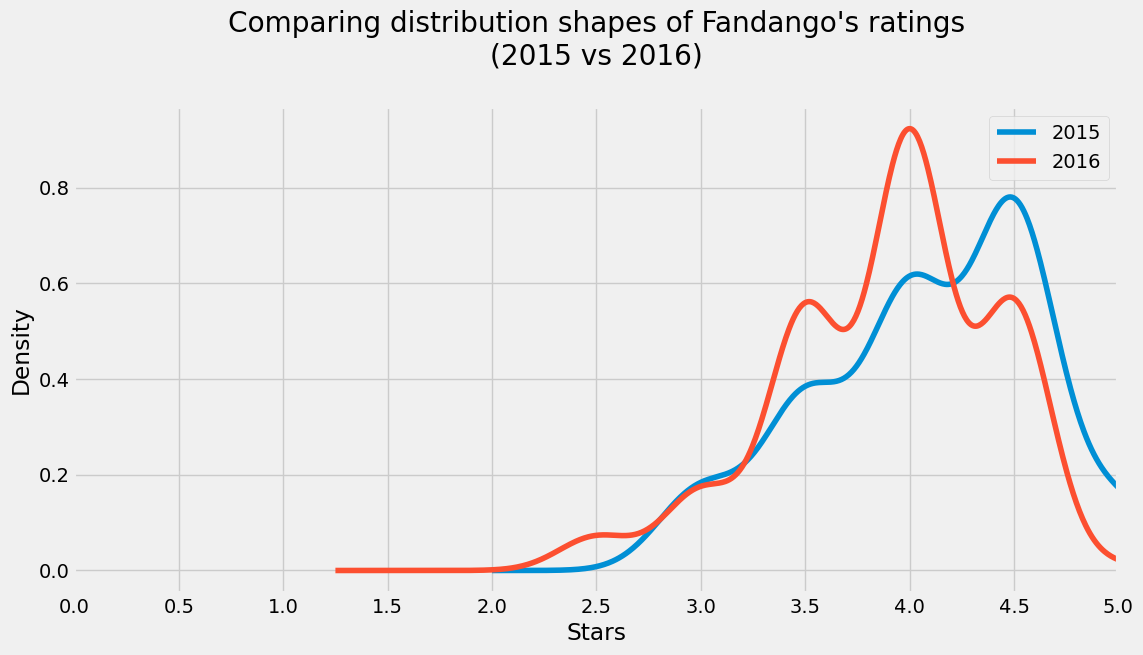

In [26]:
select_predata2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (12,6))
select_after2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes of Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

In [27]:
select_predata2015['Fandango_Stars'].describe()

count    129.000000
mean       4.085271
std        0.538096
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [28]:
select_after2016['fandango'].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64

##  Conclusiones 

### What is the shape of each distribution?
> Answer: Both distributions are strongly left skewed towards 
> highest ratings


### How do their shapes compare? And if their shapes are similar, is there anything that clearly differentiates them?
> Answer: Both the distributions are strongly left skewed towards 
> highest ratings but when comparing each others shapes we see 
> 2016 is slightly shifted to the left compared to the shape of 
> 2015 distribution.

### Can we see any evidence on the graph that suggests that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016? And provided there's a difference, can we tell anything about the direction of the difference? In other words, were movies in 2016 rated lower or higher compared to 2015?
> Answer: Yes, though both the distributions are strongly left 
> skewed towards highest ratings but when comparing each others 
> shapes we do see 2016 is slightly shifted to the left compared 
> to the shape of 2015 distribution. This slight difference in 
> their direction towards being left skewed to highest ratings 
> shows that the ratings were slightly lower in 2016 compared 
> to 2015 ratings.




In [29]:
# absolute frequency
select_predata2015['Fandango_Stars'].value_counts(dropna = False).sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [30]:
# absolute frequency
select_predata2015['Fandango_Stars'].value_counts(dropna = False).sort_index()

3.0    11
3.5    23
4.0    37
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [31]:
# proportional relative frequency
select_predata2015['Fandango_Stars'].value_counts(normalize=True).sort_index()

3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [32]:
# proportional relative frequency
select_predata2015['Fandango_Stars'].value_counts(normalize=True).sort_index()

3.0    0.085271
3.5    0.178295
4.0    0.286822
4.5    0.379845
5.0    0.069767
Name: Fandango_Stars, dtype: float64

In [33]:
# proportional relative frequency
select_after2016['fandango'].value_counts(normalize=True).sort_index()

2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64

In [34]:
# relative frequency proportional precentages
select_predata2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100 

3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In [35]:
# relative frequency proportional precentages
select_after2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

> From above code we do see the difference in ratings of 2015 and 
> 2016 movies. This thus explains us the slight difference we saw 
> above in the kernel density plots direction of 2015 and 2016 
> movie ratings on being left skewed towards the highest ratings.
>
> Now let us dive a bit deeper to see the percentile rank to get 
> more clear picture.




In [36]:
from scipy.stats import percentileofscore

In [37]:
round(percentileofscore(select_predata2015['Fandango_Stars'], score=2.5, kind='weak'), 2)

0.0

In [38]:
round(percentileofscore(select_predata2015['Fandango_Stars'], score=3, kind='weak'),2)

8.53

In [39]:
round(percentileofscore(select_predata2015['Fandango_Stars'], score=3.5, kind='weak'),2)

26.36

In [40]:
for i in range(1,25):
    i = i/5
    print(round(percentileofscore(select_predata2015['Fandango_Stars'], score=i, kind='weak'),2))

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
8.53
8.53
8.53
26.36
26.36
55.04
55.04
55.04
93.02
93.02


In [41]:
for i in range(1,50,2):
    i = i/2.5
    print("i:",i)
    print(round(percentileofscore(select_after2016['fandango'], score=i, kind='weak'),2))

i: 0.4
0.0
i: 1.2
0.0
i: 2.0
0.0
i: 2.8
3.14
i: 3.6
34.55
i: 4.4
74.87
i: 5.2
100.0
i: 6.0
100.0
i: 6.8
100.0
i: 7.6
100.0
i: 8.4
100.0
i: 9.2
100.0
i: 10.0
100.0
i: 10.8
100.0
i: 11.6
100.0
i: 12.4
100.0
i: 13.2
100.0
i: 14.0
100.0
i: 14.8
100.0
i: 15.6
100.0
i: 16.4
100.0
i: 17.2
100.0
i: 18.0
100.0
i: 18.8
100.0
i: 19.6
100.0


In [42]:
# Compute the mean, median, and mode for each distribution.

In [43]:
mean_2015 = round(select_predata2015['Fandango_Stars'].mean(),2)
mean_2016 = round(select_after2016['fandango'].mean(),2)

median_2015 = round(select_predata2015['Fandango_Stars'].median(),2)
median_2016 = round(select_after2016['fandango'].median(),2)

mode_2015 = round(select_predata2015['Fandango_Stars'].mode()[0],2) # the output of Series.mode() is a bit uncommon
mode_2016 = round(select_after2016['fandango'].mode()[0],2)

summary = pd.DataFrame({
'2015': [mean_2015, median_2015, mode_2015],
'2016': [mean_2016, median_2016, mode_2016],},
index = ['mean', 'median', 'mode'],)
summary

,2015,2016
mean,4.09,3.89
median,4.00,4.00
mode,4.50,4.00


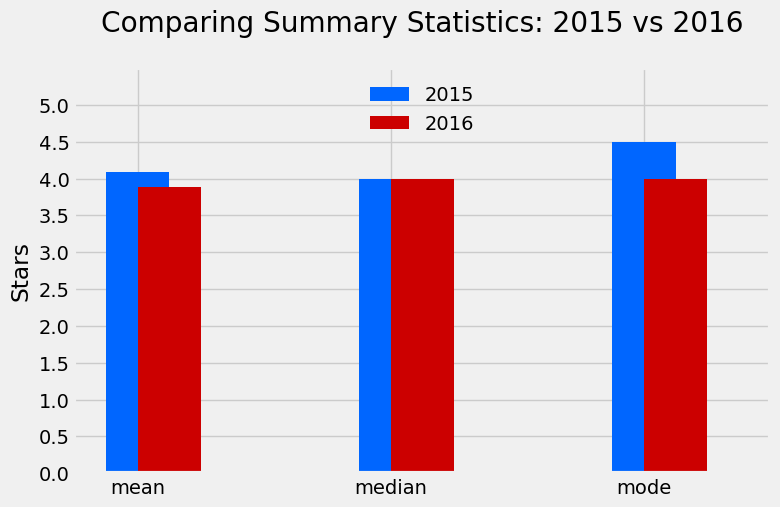

In [44]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25, figsize = (8,5))
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25, rot = 0)

plt.title('Comparing Summary Statistics: 2015 vs 2016', y = 1.07)
# the `y` parameter pads the title upward
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0,loc = 'upper center')
# framealpha, controls the alpha transparency of the legend's background.
plt.show()

In [45]:
meandiff = round(summary.iloc[0,0] - summary.iloc[0,1],2)
meandiff

0.2

In [46]:
mediandiff = round(summary.iloc[1,0] - summary.iloc[1,1],2)
mediandiff

0.0

In [47]:
modediff = round(summary.iloc[2,0] - summary.iloc[2,1],2)
modediff

0.5

In [48]:
# meandiff in percentage relative to the mean rating in 2015
meandiff_per = round(meandiff / summary.iloc[0,0] * 100,2)
meandiff_per

4.89

> As seen in above code:
>
> * The mean of the rating is lower in 2016 with approximately 
> 0.2. that to say a drop of almost 4.89% relative to the mean 
> rating in 2015.
>
> * The median is the same for both 2015 and 2016 rating 
> distributions. 
>
> * The mode is lower in 2016 by 0.5. 
>
> Thus here too it confirms what we saw above - the slight 
> difference in the kernel density plots direction of 2015 and
> 2016 movie ratings that there's indeed a slight difference
> between Fandango's ratings for popular movies in 2015 and 
> Fandango's ratings for popular movies in 2016 - that is the 
> popular movies released in 2016 were rated slightly lower than 
> the popular movies released in 2015.

# Conclusion

> As we set out with a new goal for this project to analyse that 
> whether there's any difference between Fandango's ratings for
> popular movies in 2015 and Fandango's ratings for popular 
> movies in 2016.
>
> And indeed we did analyse that there is a slight difference 
> between Fandango's ratings for popular movies in 2015 and
> Fandango's ratings for popular movies in 2016 - that is the
> popular movies released in 2016 were rated slightly lower than 
> the popular movies released in 2015.
> 
> Seeing this slight changes we can assume that Fandango may have 
> taken some steps to fix the biased rating system after Hickey's
> analysis.